#Introduzione ai Modelli di Diffusione con la Libreria Diffusers di Hugging Face

##Author: Giulia Torsani

Alma Mater Studiorum, Università di Bologna  SCUOLA DI SCIENZE, Corso di Laurea in Informatica

In questo documento introduciamo i modelli di diffusione e come questi possano essere utilizzati nella libreria Diffusers di Hugging Face. Verranno discussi i concetti base, le applicazioni principali e sarà proposta una semplice demo per aiutare il lettore a comprendere meglio il funzionamento di questi modelli.

#Introduzione


I modelli di diffusione sono una classe di modelli generativi che apprendono a generare dati a partire da una distribuzione rumorosa, migliorando iterativamente la qualità dell'immagine.

Come ci suggerisce il termine "generativi", tali modelli vengono utilizzati per generare dati simili a quelli su cui sono stati addestrati. Fondamentalmente, i Modelli di Diffusione funzionano distruggendo i dati di addestramento attraverso l'aggiunta successiva di rumore gaussiano e poi apprendendo a recuperare i dati invertendo questo processo di aggiunta di rumore. Dopo l'addestramento, possiamo utilizzare il Modello di Diffusione per generare dati semplicemente passando del rumore campionato casualmente attraverso il processo di denoising appreso.

La libreria <b>Diffusers</b> di Hugging Face mette a disposizione una serie di strumenti che semplificano l'implementazione e l'utilizzo di questi modelli.

#Teoria dei Modelli di Diffusione

In questa sezione, spiegheremo brevemente la teoria alla base dei modelli di diffusione, inclusi:
    <li><b>Processo di diffusione</b>: una descrizione del processo di aggiunta graduale di rumore ai dati.</li>
    <li><b>Denoising Diffusion</b>: la procedura per rimuovere il rumore dai dati e generare nuovi campioni.</li>


##Processo di diffusione


Il processo di diffusione è il primo passo nel funzionamento dei modelli di diffusione e si basa sull'idea di "degradare" gradualmente i dati. Più specificamente, il modello applica una sequenza di trasformazioni progressive sui dati originali aggiungendo rumore gaussiano. Ogni passaggio di questo processo può essere rappresentato come un punto in una catena di Markov, dove il rumore viene aggiunto iterativamente, spingendo l'immagine verso una distribuzione di rumore puro.

Lo scopo di questo processo è quello di rappresentare i dati iniziali in una forma che, in ultima analisi, sia asintoticamente vicina a un puro rumore gaussiano. In questo contesto, le variabili latenti del modello di diffusione assumono un ruolo importante: ciascuna variabile latente rappresenta lo stato "rumoroso" del dato originale in un determinato punto della catena. Come illustrato nella figura sottostante, possiamo osservare come un’immagine viene progressivamente trasformata lungo questa catena.

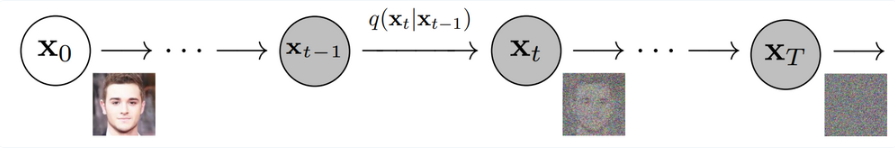



##Denoising Diffusion

Il secondo passo nei modelli di diffusione è la "Denoising Diffusion" o diffusione di denoising, il processo inverso al precedente. Qui, l'obiettivo è addestrare il modello a invertire il rumore aggiunto ai dati, consentendo al modello di recuperare una rappresentazione pulita e fedele dei dati originali partendo dal rumore puro. Durante l’addestramento, il modello apprende a "denoisizzare" in modo progressivo, partendo da un'immagine rumorosa fino a raggiungere una forma che somigli al dato reale.

In pratica, attraversando questa catena di Markov all'indietro, il modello genera nuovi dati simil-realistici partendo da rumore casuale. Questa sequenza di denoising rappresenta la capacità del modello di diffondere informazioni, partendo dal rumore verso l’immagine finale e producendo una sintesi realistica.

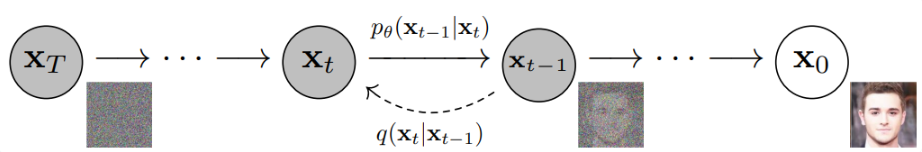

#La Libreria Diffusers di Hugging Face

La libreria Diffusers di Hugging Face è un framework progettato per semplificare l'utilizzo dei modelli di diffusione nel deep learning, in particolare per compiti di generazione di immagini, inpainting, denoising, super-resolution, e altre applicazioni creative e di miglioramento delle immagini.
La libreria Diffusers offre strumenti per implementare diversi tipi di modelli di diffusione, i quali vengono rapidamente elencati nel paragrafo successivo.

Questa sezione descrive:
    <li><b>Elenco dei modelli:</b> rapida panoramica dei modelli presenti all'interno della libreria.</li>
    <li><b>Componenti principali:</b> introduzione ai moduli fondamentali (scheduler, model, sampler) e un accenno al componente Pipeline.</li>
    <li><b>Configurazione di un Modello:</b> passaggi per iniziare a utilizzare un modello di diffusione con Diffusers.</li>


##Elenco dei modelli

Viene riportato qui di seguito un rapido elenco:
<li><b>DDPM (Denoising Diffusion Probabilistic Models):</b> Il modello di base tra i modelli di diffusione, introdotto per generare immagini attraverso un processo di denoising progressivo. Utilizza una catena di Markov per aggiungere rumore ai dati e successivamente rimuoverlo durante il processo di generazione.</li>

<li><b>DDIM (Denoising Diffusion Implicit Models):</b> Variante di DDPM che consente un campionamento più veloce, riducendo il numero di passaggi di denoising necessari. Questo modello mantiene alta la qualità dell’immagine generata, migliorando al contempo l’efficienza computazionale.</li>

<li><b>Score-Based Models (SDE - Stochastic Differential Equations):</b> Modelli che formulano il processo di diffusione come un'equazione differenziale stocastica (SDE). Consentono una flessibilità aggiuntiva nel processo di generazione di immagini, utile in particolare per applicazioni di denoising avanzato.</li>

<li><b>Latent Diffusion Models (LDM):</b> Modelli di diffusione latente che operano su uno spazio latente compresso anziché sullo spazio originale dei dati, riducendo i costi computazionali senza compromettere la qualità delle immagini generate. Spesso utilizzati per compiti di sintesi ad alta risoluzione.</li>

<li><b>Imagen e Parti Similar Models:</b> Modelli di diffusione avanzati, come Imagen di Google, che impiegano tecniche di diffusione per generare immagini di alta qualità da input di testo. Sono particolarmente utilizzati per compiti di Text-to-Image generation.</li>

<li><b>Stable Diffusion:</b> Modello di diffusione ampiamente utilizzato per la generazione di immagini a partire da testo, con un’elevata qualità delle immagini prodotte. Utilizza una combinazione di tecniche di diffusione latente ed è particolarmente ottimizzato per la creazione di immagini realistiche e creative.</li>

##Componenti principali

 Di seguito riportiamo una breve spiegazione dei tre moduli fondamentali su cui si basa la libreria Diffusers Hugging Face.

<li><b>Scheduler:</b>
    controlla come il rumore viene aggiunto e rimosso progressivamente durante il processo di generazione dell'immagine. Il suo ruolo è orchestrare il percorso temporale lungo il quale il modello applica le trasformazioni. Lo scheduler definisce la strategia di passaggio tra i vari step di diffusione, gestendo la quantità di rumore da aggiungere o sottrarre in ciascuno di essi.</li>
<li><b>Model:</b>
    il cuore del sistema. È il modello neurale che apprende a generare immagini a partire da input rumorosi. Utilizza le tecniche di apprendimento automatico per rimuovere il rumore dall'immagine generata durante il processo iterativo di diffusione. Generalmente è un modello U-Net, che opera su vari livelli di granularità dell'immagine per ottenere risultati dettagliati.</li>
<li><b>Sampler:</b>
    si occupa della modalità di campionamento, ossia il metodo per generare immagini dal modello addestrato. Il sampler definisce come viene gestito l'input rumoroso all'interno del processo di reverse diffusion, determinando l'efficacia con cui il modello può campionare immagini realistiche dai dati rumorosi iniziali.</li>


All'interno della libreria è presente un ulteriore componente aggiuntivo, chiamato <b>Pipeline</b>. Quest ultimo è il componente che orchestra l'intero processo di generazione delle immagini, integrando tutte le parti fondamentali (scheduler, model e sampler) in un flusso unificato. In pratica, semplifica l'interazione con questi componenti per l'utente, permettendo di generare immagini con pochi comandi, senza doversi preoccupare dei dettagli interni.
Poichè tale componente fa risultare il processo eccessivamente automatizzato e ad alto livello, in questo documento non verrà ulteriormente trattato.

##Configurazione di un Modello

 Per poter configurare facilmente un modello, quindi, potremo scegliere come combinare le componenti menzionate sopra selezionando quelle a noi più adatte direttamente dalla Documentazione di Diffusers su Hugging Face (https://huggingface.co/docs/diffusers) e importandole nel nostro codice.
  I dettagli implementativi saranno trattati nella sezione successiva.
  Per l'ambiente di esecuzione è consigliabile utilizzare Google Colab(https://colab.research.google.com/), che permette di sfruttare una GPU per garantire una maggiore velocità di calcolo. In Google Colab possiamo inoltre importare tutte le librerie necessarie in un unico notebook, senza doverle installare in locale.

#Esempio di Utilizzo

Questa sezione fornirà una demo di base, che include il codice per:


  <li> Importare e configurare un modello predefinito. </li>
  <li> Eseguire una generazione di esempio e visualizzare i risultati.</li>
In particolare, utilizzeremo <b>UNet2DModel</b> come modello e <b>DDIMScheduler</b> come scheduler. Il dataset scelto per la demo è <b>MNIST</b>, al quale applicheremo un processo di addizione del rumore. Successivamente, alleneremo il modello e implementeremo un sampler per rimuovere il rumore dalle immagini deteriorate, ottenendo così un'immagine il più nitida possibile.

Il codice sarà scritto in Python, utilizzando PyTorch come framework principale e Matplotlib per la visualizzazione delle immagini generate e restaurate.

##Demo di Diffusers di Huggingface#


### Installare le librerie necessarie

In [ ]:
!pip install --upgrade diffusers accelerate transformers
!pip install datasets torchvision

!pip uninstall pyarrow
!pip install pyarrow==15.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Un

###  Importare le librerie

In [ ]:
# Importare le librerie
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from diffusers import UNet2DModel, DDIMScheduler

# Verifica della versione
#print("Diffusers version:", diffusers.__version__)

In [ ]:
import numpy as np

### Caricare e preparare un dataset di immagini

In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizzazione tra -1 e 1
])
#usiamo il dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

###  Visualizzare alcune immagini del dataset

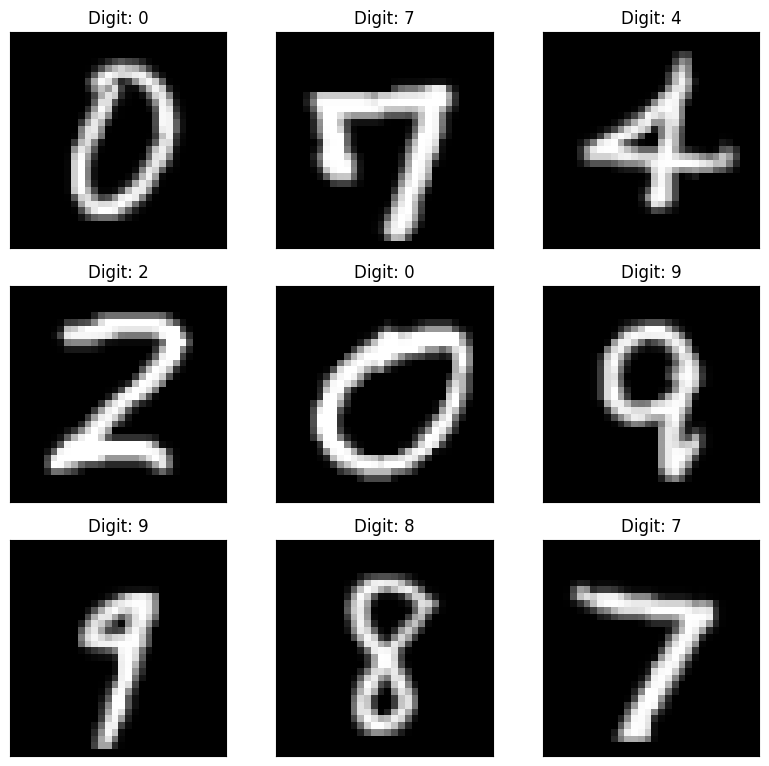

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

###  Definire il modello (Model)

In [ ]:
model = UNet2DModel(
    sample_size=32,       # Dimensione delle immagini (32x32)
    in_channels=1,        # Canali di input (grayscale)
    out_channels=1,       # Canali di output
    layers_per_block=2,   # Numero di layer per blocco
    block_out_channels=(64, 128, 256),  # Canali per blocco
    down_block_types=("DownBlock2D", "DownBlock2D", "DownBlock2D"),  # Tipi di blocchi di downsampling
    up_block_types=("UpBlock2D", "UpBlock2D", "UpBlock2D"),          # Tipi di blocchi di upsampling
).to('cuda')

###  Definire lo scheduler (Scheduler)

In [ ]:
scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.0001,
    beta_end=0.02,
    beta_schedule="linear",
    clip_sample=False,
    set_alpha_to_one=False
)

### Implementare il processo di addizione del rumore

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
repo_id = "google/ddpm-cat-256"
unet = UNet2DModel.from_pretrained(repo_id, use_safetensors=True).to(device)
scheduler = DDIMScheduler(num_train_timesteps=1000)

def add_noise(imgs, timesteps):
    noise = torch.randn_like(imgs).to(imgs.device)  # Assicurati che il rumore sia sulla stessa device
    timesteps = timesteps.to(imgs.device)  # Sposta i timesteps sulla stessa device

    # Assicurati che scheduler.alphas_cumprod sia sullo stesso dispositivo
    alphas_cumprod = scheduler.alphas_cumprod.to(imgs.device)

    # Controlla che le dimensioni siano corrette
    assert imgs.shape[0] == noise.shape[0], "Mismatch in batch size"

    sqrt_alpha_prod = alphas_cumprod[timesteps] ** 0.5
    sqrt_one_minus_alpha_prod = (1 - alphas_cumprod[timesteps]) ** 0.5

    sqrt_alpha_prod = sqrt_alpha_prod.flatten().view(-1, 1, 1, 1)
    sqrt_one_minus_alpha_prod = sqrt_one_minus_alpha_prod.flatten().view(-1, 1, 1, 1)

    noisy_images = sqrt_alpha_prod * imgs + sqrt_one_minus_alpha_prod * noise
    return noisy_images, noise

In [ ]:
print(f"Dispositivo di timesteps: {timesteps.device}")
print(f"Dispositivo di alphas_cumprod: {scheduler.alphas_cumprod.device}")

Dispositivo di timesteps: cuda:0
Dispositivo di alphas_cumprod: cpu


### Eseguire il training del modello

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
loss_fn = torch.nn.MSELoss()
epochs = 5  # Numero di epoche

In [ ]:
#ciclo di training
model.train()
for epoch in range(epochs):
    for step, (images, _) in enumerate(train_loader):
        images = images.to('cuda')
        optimizer.zero_grad()

        # Generiamo timesteps casuali per ogni immagine nel batch
        batch_size = images.shape[0]
        timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (batch_size,), device='cuda').long()

        # Aggiungiamo rumore alle immagini
        noisy_images, noise = add_noise(images, timesteps)

        # Predizione del rumore
        noise_pred = model(noisy_images, timesteps).sample

        # Calcolo della perdita
        loss = loss_fn(noise_pred, noise)
        loss.backward()
        optimizer.step()

        if step % 500 == 0:
            print(f"Epoch {epoch+1}, Step {step}, Loss: {loss.item():.4f}")

Epoch 1, Step 0, Loss: 0.0417
Epoch 1, Step 500, Loss: 0.0269
Epoch 2, Step 0, Loss: 0.0126
Epoch 2, Step 500, Loss: 0.0214
Epoch 3, Step 0, Loss: 0.0166
Epoch 3, Step 500, Loss: 0.0199
Epoch 4, Step 0, Loss: 0.0202
Epoch 4, Step 500, Loss: 0.0129
Epoch 5, Step 0, Loss: 0.0175
Epoch 5, Step 500, Loss: 0.0183


### Implementare il processo di generazione (Sampler)

In [ ]:
#Impostiamo i timesteps per l'inferenza:
scheduler.set_timesteps(num_inference_steps=50)
#Inizializziamo un'immagine di rumore:
sample = torch.randn((1, 1, 32, 32)).to('cuda')
#Processo di denoising:
model.eval()
with torch.no_grad():
    for t in scheduler.timesteps:
        # Predizione del rumore residuo
        residual = model(sample, t).sample
        # Calcolo del precedente campione
        sample = scheduler.step(residual, t, sample).prev_sample

### Visualizzare l'immagine generata

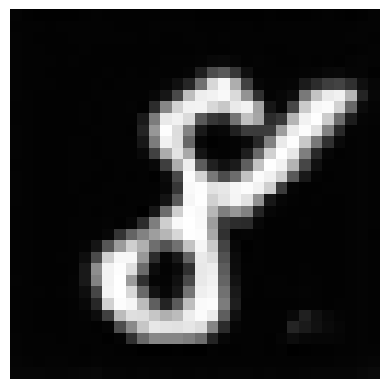

In [ ]:
generated_img = sample.squeeze().detach().cpu()
generated_img = (generated_img + 1) / 2  # Denormalizzazione
plt.imshow(generated_img, cmap='gray')
plt.axis('off')
plt.show()

### Considerazioni finali

Tramite questo notebook abbiamo quindi compreso come interagiscono i tre blocchi principali della libreria Diffusers.

Suggerimento:
Salvataggio e caricamento del modello: puoi salvare il modello addestrato per usi futuri.

In [ ]:
torch.save(model.state_dict(), 'diffusion_model.pth')

Nota: è possibile esplorare diversi scheduler e sampler: in base a tale scelta otterremo variazioni nei risultati.

Nota2: Possiamo variare il numero di epoche, in particolare incrementando il numero di epoche otterremo risultati migliori, aumentando però anche il tempo necessario di addestramento del modello.

#Conclusione

I modelli di diffusione rappresentano un approccio avanzato e potente per la generazione di dati complessi, come immagini ad alta risoluzione, testi sintetici e miglioramenti di immagini. Grazie alla libreria Diffusers di Hugging Face, la complessità dell'implementazione di questi modelli è stata notevolmente ridotta, rendendoli accessibili non solo ai ricercatori esperti, ma anche agli sviluppatori interessati alle applicazioni di intelligenza artificiale. Diffusers offre una gamma completa di strumenti e componenti modulari, come scheduler, modelli e sampler, che facilitano l'adozione di tecniche di diffusione per compiti di generazione creativa, restauro e miglioramento di immagini.

In futuro, la versatilità e la continua ottimizzazione dei modelli di diffusione potrebbero aprire nuove possibilità nei settori della creazione di contenuti e dell'analisi dei dati visivi.

#Riferimenti

<li>Documentazione ufficiale della libreria Diffusers:

https://huggingface.co/docs/diffusers</li>
<li> Libro Deep Learning M.Bishop
   
   https://www.bishopbook.com/
   </li>
<li> Articoli sui modelli di diffusione e deep learning:
    
  https://www.assemblyai.com/blog/diffusion-models-for-machine-learning-introduction/


  https://arxiv.org/pdf/2006.11239.pdf
  </li>